<a href="https://colab.research.google.com/github/sayakpaul/Generating-categories-from-arXiv-paper-titles/blob/master/EDA_and_data_splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install facets-overview==1.0.0

In [0]:
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from IPython.core.display import display, HTML
from google.colab import widgets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import base64
import re

In [0]:
np.random.seed(666)

In [24]:
arxiv_data = pd.read_csv('data/arXivdata.csv')
arxiv_data.head()

title                                             labels
0  Dual Recurrent Attention Units for Visual Ques...  ["'cs.AI'", "'cs.CL'", "'cs.CV'", "'cs.NE'", "...
1  Sequential Short-Text Classification with Recu...  ["'cs.CL'", "'cs.AI'", "'cs.LG'", "'cs.NE'", "...
2  Multiresolution Recurrent Neural Networks: An ...  ["'cs.CL'", "'cs.AI'", "'cs.LG'", "'cs.NE'", "...
3  Learning what to share between loosely related...  ["'stat.ML'", "'cs.AI'", "'cs.CL'", "'cs.LG'",...
4              A Deep Reinforcement Learning Chatbot  ["'cs.CL'", "'cs.AI'", "'cs.LG'", "'cs.NE'", "...

In [25]:
arxiv_data.shape

(41000, 2)

In [26]:
arxiv_data['labels'] = arxiv_data['labels'].str.replace(r"[\"\']", '')
arxiv_data.head()

title                                 labels
0  Dual Recurrent Attention Units for Visual Ques...  [cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]
1  Sequential Short-Text Classification with Recu...  [cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]
2  Multiresolution Recurrent Neural Networks: An ...  [cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]
3  Learning what to share between loosely related...  [stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]
4              A Deep Reinforcement Learning Chatbot  [cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]

In [27]:
len(arxiv_data['labels'].unique())

2606

In [28]:
grouped_labels = arxiv_data.groupby('labels').size().reset_index(name='count')
top_100_labels = grouped_labels.nlargest(100, columns="count")
top_100_labels[:10]

labels  count
759                   [cs.CV]   8895
242                   [cs.AI]   3788
496                   [cs.CL]   3773
1539         [cs.LG, stat.ML]   1655
2603                [stat.ML]   1606
1540                  [cs.LG]   1587
2587         [stat.ML, cs.LG]   1305
1796                  [cs.NE]   1205
696            [cs.CV, cs.LG]    521
1235  [cs.LG, cs.AI, stat.ML]    377

In [29]:
arxiv_data_pruned = arxiv_data[arxiv_data['labels'].isin(top_100_labels['labels'].tolist())]
arxiv_data_pruned.head()

title                 labels
519  Transition-Based Dependency Parsing with Stack...  [cs.CL, cs.LG, cs.NE]
520  A Semisupervised Approach for Language Identif...  [cs.CL, cs.LG, cs.NE]
521  First-Pass Large Vocabulary Continuous Speech ...  [cs.CL, cs.LG, cs.NE]
523          Syntax-based Deep Matching of Short Texts  [cs.CL, cs.LG, cs.NE]
525   Diverse Embedding Neural Network Language Models  [cs.CL, cs.LG, cs.NE]

In [30]:
arxiv_data_pruned[arxiv_data_pruned['labels']=="['cs.CV']"].head()

Empty DataFrame
Columns: [title, labels]
Index: []

In [31]:
#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': arxiv_data_pruned, 'name': 'Data'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

(0, 300)

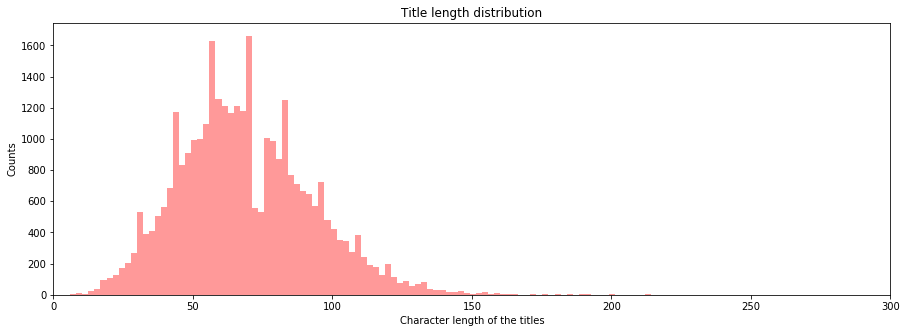

In [32]:
text_lens = arxiv_data_pruned['title'].apply(len).values
fig = plt.figure()
fig.set_size_inches(15, 5)
g = sns.distplot(text_lens, kde=False, bins=100, color='red')
g.set_xlabel('Character length of the titles')
g.set_ylabel('Counts')
g.set_xticks(np.arange(-50, 1200, 50))
g.set_title('Title length distribution')
g.set_xlim(0, 300)

In [33]:
arxiv_data_pruned[arxiv_data_pruned['labels'].str.len()== \
                  arxiv_data_pruned['labels'].str.len().max()]['labels'].unique()

array(['[math.ST, cs.LG, stat.ML, stat.TH]',
       '[stat.ML, cs.LG, math.ST, stat.TH]'], dtype=object)

In [34]:
arxiv_data_pruned[arxiv_data_pruned['labels']=="['math.ST', 'cs.LG', 'stat.ML', 'stat.TH']"].describe()

title  labels
count       0       0
unique      0       0

In [35]:
arxiv_data_pruned[arxiv_data_pruned['labels']=="['stat.ML', 'cs.LG', 'math.ST', 'stat.TH']"].describe()

title  labels
count       0       0
unique      0       0

In [36]:
arxiv_data_pruned['title_length'] = arxiv_data_pruned['title'].map(len)
arxiv_data_pruned['labels_length'] = arxiv_data_pruned['labels'].map(len)
arxiv_data_pruned.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


title  ... labels_length
18391  Probabilistic Semantic Web Mining Using Artifi...  ...             7
16041  Median-Based Generation of Synthetic Speech Du...  ...             7
24835  Background Modelling using Octree Color Quanti...  ...             7
26962  Automatic Generation of Typographic Font from ...  ...             7
19105  A Combination of Cutset Conditioning with Cliq...  ...             7
15979  Grounded Lexicon Acquisition - Case Studies in...  ...             7
29720  Does Normalization Methods Play a Role for Hyp...  ...             7
20095  On computable abstractions (a conceptual intro...  ...             7
17025  SemEval-2017 Task 1: Semantic Textual Similari...  ...             7
38607  Multi-Level Feature Descriptor for Robust Text...  ...            14

[10 rows x 4 columns]

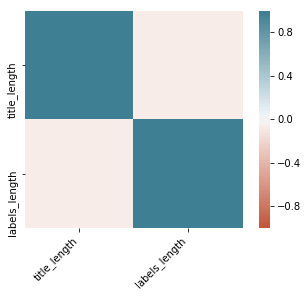

In [37]:
corr = arxiv_data_pruned.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [38]:
X_train, X_test, y_train, y_test = train_test_split(arxiv_data_pruned['title'], 
                                                    arxiv_data_pruned['labels'],
                                                    stratify=np.array(arxiv_data_pruned['labels']),
                                                    test_size=0.2, random_state=666)
X_train.shape, X_test.shape

((26154,), (6539,))

In [0]:
mlb = MultiLabelBinarizer()
mlb.fit([y_train])
labels = mlb.classes_

In [40]:
labels[:10]

array(['[cs.AI, cs.CC]', '[cs.AI, cs.CV]', '[cs.AI, cs.CY]',
       '[cs.AI, cs.DB]', '[cs.AI, cs.DS]', '[cs.AI, cs.GT]',
       '[cs.AI, cs.HC]', '[cs.AI, cs.IR]', '[cs.AI, cs.LG, stat.ML]',
       '[cs.AI, cs.LG]'], dtype=object)

In [42]:
top_100_labels['class_weight'] = len(y_train) / top_100_labels['count']
class_weight = {}
for index, label in enumerate(labels):
    class_weight[index] = top_100_labels[top_100_labels['labels'] == label]['class_weight'].values[0]
    
top_100_labels.head()

labels  count  class_weight
759            [cs.CV]   8895      2.940304
242            [cs.AI]   3788      6.904435
496            [cs.CL]   3773      6.931884
1539  [cs.LG, stat.ML]   1655     15.803021
2603         [stat.ML]   1606     16.285181

In [43]:
# I am gonna take note of these weights
class_weight

{0: 533.7551020408164,
 1: 475.5272727272727,
 2: 458.8421052631579,
 3: 421.83870967741933,
 4: 458.8421052631579,
 5: 373.62857142857143,
 6: 568.5652173913044,
 7: 408.65625,
 8: 126.96116504854369,
 9: 89.26279863481228,
 10: 86.31683168316832,
 11: 384.61764705882354,
 12: 568.5652173913044,
 13: 747.2571428571429,
 14: 363.25,
 15: 6.904435058078142,
 16: 706.8648648648649,
 17: 331.0632911392405,
 18: 421.83870967741933,
 19: 167.65384615384616,
 20: 284.2826086956522,
 21: 284.2826086956522,
 22: 533.7551020408164,
 23: 307.6941176470588,
 24: 6.931884442088523,
 25: 670.6153846153846,
 26: 304.1162790697674,
 27: 110.35443037974683,
 28: 227.42608695652174,
 29: 594.4090909090909,
 30: 435.9,
 31: 150.31034482758622,
 32: 116.24,
 33: 50.19961612284069,
 34: 235.6216216216216,
 35: 142.1413043478261,
 36: 622.7142857142857,
 37: 153.8470588235294,
 38: 2.9403035413153455,
 39: 568.5652173913044,
 40: 258.9504950495049,
 41: 637.9024390243902,
 42: 688.2631578947369,
 43: 637.9

In [0]:
np.save('data/X_train.npy', np.array(X_train))
np.save('data/X_test.npy', np.array(X_test))
np.save('data/y_train.npy', np.array(y_train))
np.save('data/y_test.npy', np.array(y_test))

To be added:
- Annotation
- Clean the outputs
- Comments